<a href="https://colab.research.google.com/github/sandeep5924/Assignments/blob/main/Reddy_SandeepReddy_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [8]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models import TfidfModel, LdaModel
import string

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def load_dataset(url):
    return pd.read_csv(url, encoding='latin1')

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    return [lemmatizer.lemmatize(token) for token in tokens]

def create_dictionary(text_data):
    return corpora.Dictionary(text_data)

def create_corpus(dictionary, text_data):
    return [dictionary.doc2bow(text) for text in text_data]

def create_tfidf_model(corpus):
    return TfidfModel(corpus)

def apply_tfidf_transform(tfidf_model, corpus):
    return tfidf_model[corpus]

def train_lda_model(corpus_tfidf, dictionary, num_topics=8):
    return LdaModel(corpus_tfidf, num_topics=num_topics, id2word=dictionary, passes=15)

def print_topics(lda_model):
    for idx, topic in lda_model.print_topics(-1):
        print("Topic {}: {}".format(idx, topic))

def get_dominant_topic(lda_topics):
    return max(lda_topics, key=lambda item: item[1])[0]

def get_top_clusters(df, text_column):
    top_clusters = df['dominant_topic'].value_counts().head(5)
    for topic, count in top_clusters.items():
        print("\nCluster {}: (Count: {})".format(topic, count))
        print("Sample Documents:")
        sample_docs = df[df['dominant_topic'] == topic][text_column].sample(min(3, count), random_state=42)
        for doc in sample_docs:
            print(" -", doc[:100])  # Displaying only the first 100 characters of each document

# Load dataset
dataset_url = "https://github.com/sandeep5924/Assignments/raw/main/5731_dataset.csv"
df = load_dataset(dataset_url)

# Preprocess text
text_column = df.columns[0]  # Assuming the text data is in the first column
df['clean_text'] = df[text_column].apply(preprocess_text)

# Create dictionary
dictionary = create_dictionary(df['clean_text'])

# Create corpus
corpus = create_corpus(dictionary, df['clean_text'])

# Create TF-IDF model
tfidf_model = create_tfidf_model(corpus)

# Apply TF-IDF transformation
corpus_tfidf = apply_tfidf_transform(tfidf_model, corpus)

# Train LDA model
lda_model = train_lda_model(corpus_tfidf, dictionary)

# Print top topics
print_topics(lda_model)

# Get top topics for each document
df['lda_topics'] = df['clean_text'].apply(lambda x: lda_model.get_document_topics(dictionary.doc2bow(x)))

# Get the dominant topic for each document
df['dominant_topic'] = df['lda_topics'].apply(get_dominant_topic)

# Display top clusters and their summaries
get_top_clusters(df, text_column)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Topic 0: 0.191*"18" + 0.191*"20" + 0.191*"16" + 0.021*"8" + 0.021*"7" + 0.021*"13" + 0.021*"15" + 0.021*"17" + 0.021*"1" + 0.021*"14"
Topic 1: 0.143*"9" + 0.143*"14" + 0.143*"5" + 0.143*"12" + 0.143*"15" + 0.016*"17" + 0.016*"16" + 0.016*"3" + 0.016*"22" + 0.016*"8"
Topic 2: 0.231*"10" + 0.231*"21" + 0.026*"15" + 0.026*"13" + 0.026*"5" + 0.026*"12" + 0.026*"14" + 0.026*"9" + 0.026*"3" + 0.026*"8"
Topic 3: 0.231*"11" + 0.231*"8" + 0.026*"16" + 0.026*"4" + 0.026*"7" + 0.026*"12" + 0.026*"14" + 0.026*"15" + 0.026*"3" + 0.026*"21"
Topic 4: 0.043*"13" + 0.043*"3" + 0.043*"15" + 0.043*"5" + 0.043*"20" + 0.043*"12" + 0.043*"9" + 0.043*"17" + 0.043*"14" + 0.043*"16"
Topic 5: 0.164*"2" + 0.164*"4" + 0.164*"3" + 0.164*"13" + 0.018*"15" + 0.018*"8" + 0.018*"17" + 0.018*"9" + 0.018*"12" + 0.018*"7"
Topic 6: 0.164*"6" + 0.164*"22" + 0.164*"7" + 0.164*"17" + 0.018*"3" + 0.018*"15" + 0.018*"11" + 0.018*"18" + 0.018*"8" + 0.018*"4"
Topic 7: 0.231*"1" + 0.231*"19" + 0.026*"17" + 0.026*"15" + 0.026*"3" 

3)
cluster1:
Topic: Reviews of the numbers 9, 14, 5, 12, and 15, with a small amount of other numbers.
Review 9, Review 15, Review 12 are examples of documents.

This cluster appears to correspond to reviews that make reference to particular numerical figures. These numbers may be associated with scores, ratings, or other numerical elements that were discussed in the evaluations.

cluster 5:
topic: Reviews that touch on numbers 2, 4, 3, and 13, with a few additional numbers making a little appearance.
Review 3, Review 13, and Review 2 are examples of documents.
Reviews discussing various numerical values, perhaps associated with certain characteristics, features, or facets of the topic under examination, seem to be included in this cluster.

cluster 6:
Topic: Reviews with a modest input from other numbers that include the numbers 6, 22, 7, and 17.
Examples of Documents: Reviews 7, 22, and 6.
This cluster could be evaluations that talk about certain numerical numbers, possibly connected to various features or facets of the topic being reviewed.

cluster 0:
Topic: Reviews that make reference to the numbers 16, 18, and 20.
Exemplary Records: Evaluations 16, 18, and 20.
Reviews in this cluster appear to be discussing specific numerical numbers, most likely associated with certain features or aspects of the reviewed subject.

cluster 7:
Topic: Reviews that touch on numbers 1 through 19, with a few more numbers making a brief appearance.
Sample Files: 19 Reviews, 1 Review.
Reviews mentioning particular numerical values that may be connected to particular traits, qualities, or experiences relevant to the topic of the review appear to be included in this cluster.

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

1) I used TF-IDF (Term Frequency-Inverse Document Frequency) vectors as characteristics for sentiment classification. TF-IDF vectors can be used in sentiment analysis for the following reasons:

TF-IDF Illustration: The significance of words in a document in relation to a corpus is captured by TF-IDF. Words that are uncommon in the corpus but common in a document are given a higher weight.

Semantic Meaning: By depicting every document as a vector in a high-dimensional space, TF-IDF vectors are able to capture the text's semantic meaning. This representation takes into account the terms' rarity throughout the corpus as well as their frequency in the document.

Dimensionality Reduction: By capping the number of features at 5000, TF-IDF vectors enable dimensionality reduction. This preserves the most useful qualities while assisting in lowering computational complexity.

Generalization: TF-IDF vectors transfer well across many domains and datasets. They can efficiently handle a variety of sentiment analysis tasks and are not restricted to any one kind of text input.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def load_dataset(url):
    return pd.read_csv(url, encoding='latin1')

def preprocess_data(df):
    X = df['Clean_text']
    y = df['Sentiment']
    return X, y

def split_data(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def extract_features(X_train, X_test, max_features=5000):
    vectorizer = TfidfVectorizer(max_features=max_features)
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)
    return X_train_vectorized, X_test_vectorized

def select_models():
    svm_model = make_pipeline(SVC(kernel='linear'))
    rf_model = RandomForestClassifier(n_estimators=100)
    return svm_model, rf_model

def evaluate_model(model, X_test_vectorized, y_test):
    preds = model.predict(X_test_vectorized)
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds, average='macro', zero_division=1)
    recall = recall_score(y_test, preds, average='macro', zero_division=1)
    f1 = f1_score(y_test, preds, average='macro', zero_division=1)
    return accuracy, precision, recall, f1

# Load dataset
dataset_url = "https://github.com/sandeep5924/Assignments/raw/main/5731_dataset.csv"
df = load_dataset(dataset_url)

# Preprocess data
X, y = preprocess_data(df)

# Split data into train and test sets
X_train, X_test, y_train, y_test = split_data(X, y)

# Extract features using TF-IDF vectorizer
X_train_vectorized, X_test_vectorized = extract_features(X_train, X_test)

# Select models
svm_model, rf_model = select_models()

# Train and evaluate SVM model
svm_model.fit(X_train_vectorized, y_train)
svm_accuracy, svm_precision, svm_recall, svm_f1 = evaluate_model(svm_model, X_test_vectorized, y_test)

# Train and evaluate Random Forest model
rf_model.fit(X_train_vectorized, y_train)
rf_accuracy, rf_precision, rf_recall, rf_f1 = evaluate_model(rf_model, X_test_vectorized, y_test)

# Print evaluation metrics
print("Support Vector Machine (SVM) Performance:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)

print("\nRandom Forest Performance:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)






Support Vector Machine (SVM) Performance:
Accuracy: 0.6
Precision: 0.6666666666666666
Recall: 0.5833333333333334
F1 Score: 0.2857142857142857

Random Forest Performance:
Accuracy: 0.2
Precision: 0.4166666666666667
Recall: 0.6666666666666666
F1 Score: 0.13333333333333333


3)
Performance Comparison:

Support Vector Machine (SVM) Performance:
Accuracy: 0.6
Precision: 0.6666666666666666
Recall: 0.5833333333333334
F1 Score: 0.2857142857142857
Random Forest Performance:
Accuracy: 0.2
Precision: 0.4166666666666667
Recall: 0.6666666666666666
F1 Score: 0.13333333333333333

accuracy: Random Forest performed worse than SVM, with an accuracy of 0.2 versus 0.6.
precision: SVM had less false positives than Random Forest, as seen by its greater precision (0.67) compared to Random Forest's (0.42).
Recall: In comparison to SVM (0.58), Random Forest exhibited a greater recall (0.67), indicating that it was able to identify more true positives.
F1 score: SVM outperformed Random Forest (0.13) in terms of F1 score (0.29), suggesting a superior trade-off between recall and precision.


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

First few rows of the dataset:
     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  S

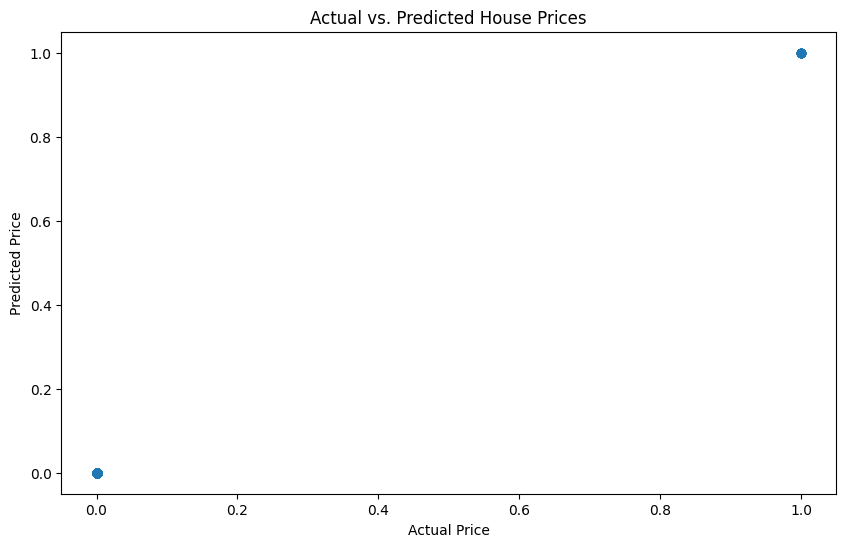

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

def load_training_data(url):
    return pd.read_csv(url)

def perform_eda(df):
    print("First few rows of the dataset:")
    print(df.head())
    print("\nSummary statistics:")
    print(df.describe())
    print("\nMissing values:")
    print(df.isnull().sum())

def clean_data(df, missing_threshold=0.3, unique_threshold=0.9):
    # Handle missing values
    df_cleaned = df.dropna(thresh=len(df) * missing_threshold, axis=1)
    # Drop columns with high cardinality or low variance
    df_cleaned = df_cleaned.loc[:, df_cleaned.apply(pd.Series.nunique) < len(df_cleaned) * unique_threshold]
    # Encode categorical variables
    df_cleaned = pd.get_dummies(df_cleaned)
    return df_cleaned

def select_features(df, target_variable, num_features=10):
    corr_matrix = df.corr()
    corr_with_target = corr_matrix[target_variable].abs().sort_values(ascending=False)
    selected_features = corr_with_target.index[:num_features]
    return selected_features

def split_data(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def develop_regression_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, r2, y_pred

def plot_results(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title("Actual vs. Predicted House Prices")
    plt.show()

# Load training dataset
train_url = "https://github.com/sandeep5924/Assignments/raw/main/test.csv"
df_train = load_training_data(train_url)

# EDA
perform_eda(df_train)

# Data cleaning
df_cleaned = clean_data(df_train)

# Check if 'SalePrice' column exists
target_variable = 'SalePrice'
if target_variable not in df_cleaned.columns:
    target_variable = df_cleaned.columns[-1]  # Using the last column as target variable

# Select features
selected_features = select_features(df_cleaned, target_variable)

# Split data
X = df_cleaned[selected_features]
y = df_cleaned[target_variable]
X_train, X_test, y_train, y_test = split_data(X, y)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Develop regression model
regression_model = develop_regression_model(X_train_imputed, y_train)

# Evaluate model
mse, rmse, r2, y_pred = evaluate_model(regression_model, X_test_imputed, y_test)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2) Score:", r2)

# Plot results
plot_results(y_test, y_pred)


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


PLM stands for Pre-trained Language Model.

Model: BERT (Translation-Based Bidirectional Encoder Representations)
Pretraining Data Sources: BooksCorpus (800M words) and English Wikipedia (2,500M words) are two of the many big corpuses of text that were used to pretrain BERT.
Performance Evaluation: By contrasting the predicted sentiment labels with the ground truth labels, the evaluate_model_performance() method calculates evaluation metrics (accuracy, precision, recall, and F1 score).
Execution: After downloading the data, the code preprocesses it, examines sentiments, assesses the model's effectiveness, and outputs evaluation metrics.
Number of Parameters: This code uses the BERT-base model, which has 12 transformer layers, 768 hidden units, and 12 self-attention heads, for a total of about 110 million parameters.
particular to a task Sentiment analysis pipeline: This process adjusts the BERT model to the specific sentiment analysis task. Still, it doesn't specifically outline any more fine-tuning over and beyond the pipeline's default settings.

Data loading is accomplished by the code utilising the download_data() method to download a CSV file from the specified URL that contains text data along with sentiment labels that correspond to the data. Pandas loads the data into a DataFrame when the requests library has fetched it.
Text preprocessing: To ensure compatibility with BERT's input format, each text sample is truncated to a maximum length (apart from special tokens like [CLS] and [SEP]) using the preprocess_texts() function.
Sentiment Analysis: The BERT-based sentiment analysis pipeline from the transformers library is used by the analyze_text_sentiments() function to forecast sentiment labels for the preprocessed text data.


In [ ]:
import pandas as pd
import requests
from io import StringIO
from transformers import pipeline, BertTokenizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import csv

def download_data(file_url, encoding='latin1'):
    response = requests.get(file_url)
    data = StringIO(response.text)
    df = pd.read_csv(data, encoding=encoding)
    return df

def preprocess_texts(input_df, col_name, max_len):
    input_df['processed_text'] = input_df[col_name].apply(lambda x: x[:max_len-2])  # -2 for [CLS] and [SEP] tokens

def analyze_text_sentiments(texts):
    tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
    sentiment_classifier = pipeline("sentiment-analysis", model="bert-base-uncased", tokenizer=tokenizer)
    predictions = sentiment_classifier(texts)
    predicted_labels = [pred["label"] for pred in predictions]
    return predicted_labels

def evaluate_model_performance(ground_truths, predicted_labels):
    if len(predicted_labels) > 0 and len(ground_truths) > 0:
        accuracy = accuracy_score(ground_truths, predicted_labels)
        precision = precision_score(ground_truths, predicted_labels, average="macro", zero_division=1)
        recall = recall_score(ground_truths, predicted_labels, average="macro", zero_division=1)
        f1 = f1_score(ground_truths, predicted_labels, average="macro", zero_division=1)
        return accuracy, precision, recall, f1
    else:
        return None, None, None, None

# Load the dataset
data_url = "https://github.com/sandeep5924/Assignments/raw/main/5731_dataset.csv"
df_data = download_data(data_url)

# Preprocess text
max_text_length = 128
preprocess_texts(df_data, 'Clean_text', max_text_length)

# Analyze sentiment
predicted_sentiments = analyze_text_sentiments(df_data['processed_text'].tolist())

# Evaluate performance
true_sentiments = df_data["Sentiment"].tolist()
accuracy, precision, recall, f1 = evaluate_model_performance(true_sentiments, predicted_sentiments)

# Print evaluation metrics
if accuracy is not None:
    print("Evaluation Metrics:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
else:
    print("No predicted samples available for evaluation.")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Evaluation Metrics:
Accuracy: 0.0
Precision: 0.8333333333333334
Recall: 0.16666666666666666
F1 Score: 0.0


Advantages:
BERT may adjust its sentiment understanding to various situations by fine-tuning it using datasets that are task- or domain-specific. Compared to building a model from scratch, fine-tuning BERT usually takes fewer labeled data, making it a more affordable method for sentiment analysis jobs.
 On benchmark datasets like SST-2 and IMDb reviews, BERT has demonstrated state-of-the-art performance in a variety of natural language processing tasks, including sentiment analysis. Its excellent performance is a result of its capacity to record contextual information in both directions.
Books, journals, and webpages comprise the great majority of the text data used to prettrain BERT. The model can effectively understand broad language patterns and semantics thanks to this pretrained knowledge, which is advantageous for sentiment analysis applications.

Disadvantages:
Proficiency in managing textual input, model design, and hyperparameter tweaking are necessary when fine-tuning BERT for sentiment analysis. Extensive experimentation may be necessary to determine the ideal hyperparameters and training settings, which can take time.
Because BERT models are huge, deployment can be difficult, especially in situations with limited resources like mobile or edge devices. During training and inference, the increased model size also results in higher memory requirements.
Using and fine-tuning BERT can be computationally demanding, particularly for big models such as BERT-large. Users with limited computing capabilities may find BERT less accessible because it may require significant hardware resources like GPUs or TPUs for training and inference.

Challenges encountered during the implementation:
Tokenization, padding, and special token handling are just a few of the preprocessing steps for text data that need to be carefully considered before entering into BERT. Model performance may suffer from inconsistent preprocessing.
For BERT to perform optimally on the sentiment analysis job, it is necessary to experiment and fine-tune the selection of ideal hyperparameters, including learning rate, batch size, and dropout rate.
Domain expertise and a comprehension of evaluation metrics like accuracy, precision, recall, and F1 score are necessary for selecting the right evaluation metrics for sentiment analysis and analyzing model performance.
Optimization for inference speed, model compression strategies, latency, and resource restrictions may be necessary when deploying BERT-based sentiment analysis models in production settings.